<a href="https://colab.research.google.com/github/AP-BigQ/ML/blob/main/Sebastian_PythonML/ch13/ch13_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#All Libraries

In [82]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#Chapter 13: Parallelizing Neural Network Training with TensorFlow (Part 1/2)

In [1]:
import tensorflow as tf
print('TensorFlow version:', tf.__version__)
import numpy as np

np.set_printoptions(precision=3)

TensorFlow version: 2.15.0


In [2]:
! python -c 'import tensorflow as tf; print(tf.__version__)'

2024-05-07 15:49:40.704248: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 15:49:40.704313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 15:49:40.706122: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-07 15:49:42.598974: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2.15.0


##Creating tensors in TensorFlow

In [4]:
a = np.array([1, 2, 3], dtype=np.int32)
b = [4., 5, 6]

t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4. 5. 6.], shape=(3,), dtype=float32)


In [5]:
tf.is_tensor(a), tf.is_tensor(t_a)

(False, True)

In [6]:
t_ones = tf.ones((2, 3))

t_ones.shape

TensorShape([2, 3])

In [7]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [8]:
const_tensor = tf.constant([1.2, 5, np.pi], dtype=tf.float32)

print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


##Manipulating the data type and shape of a tensor

In [9]:
t_a_new = tf.cast(t_a, tf.int64)

print(t_a_new.dtype)

<dtype: 'int64'>


In [10]:
t = tf.random.uniform(shape=(3, 5))

t_tr = tf.transpose(t)
print(t.shape, ' --> ', t_tr.shape)

(3, 5)  -->  (5, 3)


In [11]:
t = tf.zeros((30,))

t_reshape = tf.reshape(t, shape=(5, 6))

print(t_reshape.shape)

(5, 6)


In [15]:
t = tf.zeros((1, 2, 1, 4, 1))

t_sqz = tf.squeeze(t, axis=(0, 2, 4))

print(t.shape, ' --> ', t_sqz.shape)

(1, 2, 1, 4, 1)  -->  (2, 4)


##Applying mathematical operations to tensors

In [16]:
tf.random.set_seed(1)

t1 = tf.random.uniform(shape=(5, 2),
                       minval=-1.0,
                       maxval=1.0)
print(t1)
t2 = tf.random.normal(shape=(5, 2),
                      mean=0.0,
                      stddev=1.0)
print(t2)

tf.Tensor(
[[-0.67   0.803]
 [ 0.262 -0.131]
 [-0.416  0.285]
 [ 0.952 -0.13 ]
 [ 0.32   0.21 ]], shape=(5, 2), dtype=float32)
tf.Tensor(
[[ 0.403 -1.088]
 [-0.063  1.337]
 [ 0.712 -0.489]
 [-0.764 -1.037]
 [-1.252  0.021]], shape=(5, 2), dtype=float32)


In [17]:
t3 = tf.multiply(t1, t2).numpy()
print(t3)

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]


In [18]:
t4 = tf.math.reduce_mean(t1, axis=0)

print(t4)

tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)


In [19]:
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)

print(t5.numpy())

[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]]


In [20]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)

print(t6.numpy())

[[-1.711  0.302]
 [ 0.371 -1.049]]


In [21]:
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()

print(norm_t1)

[1.046 0.293 0.504 0.96  0.383]


In [22]:
np.sqrt(np.sum(np.square(t1), axis=1))

array([1.046, 0.293, 0.504, 0.96 , 0.383], dtype=float32)

##Split, stack, and concatenate tensors

In [23]:
tf.random.set_seed(1)

t = tf.random.uniform((6,))

print(t.numpy())

t_splits = tf.split(t, 3)

[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292 0.643]


[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435], dtype=float32),
 array([0.292, 0.643], dtype=float32)]

In [25]:
tf.random.set_seed(1)
t = tf.random.uniform((5,))

print(t.numpy())

t_splits = tf.split(t, num_or_size_splits=[2, 3])

[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292]


[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435, 0.292], dtype=float32)]

In [26]:
A = tf.ones((3,))
B = tf.zeros((2,))

C = tf.concat([A, B], axis=0)
print(C.numpy())

[1. 1. 1. 0. 0.]


In [28]:
A = tf.ones((3,))
B = tf.zeros((3,))

S = tf.stack([A, B], axis=1)
print(S.numpy())

S = tf.stack([A, B], axis=0)
print(S.numpy())

[[1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 1. 1.]
 [0. 0. 0.]]


##Building input pipelines using tf.data: The TensorFlow Dataset API

##Creating a TensorFlow Dataset from existing tensors

In [29]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]

ds = tf.data.Dataset.from_tensor_slices(a)

print(ds)

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>


In [30]:
for item in ds:
    print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [34]:
ds_batch = ds.batch(3)

for i, elem in enumerate(ds_batch,5):
    print('batch {}:'.format(i), elem.numpy())

batch 5: [1.2 3.4 7.5]
batch 6: [4.1 5.  1. ]


##Combining two tensors into a joint dataset

In [37]:
tf.random.set_seed(1)

t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

print(t_x)
print(t_y)

tf.Tensor(
[[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]
 [0.605 0.637 0.614]], shape=(4, 3), dtype=float32)
tf.Tensor([0 1 2 3], shape=(4,), dtype=int32)


In [36]:
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)

ds_joint = tf.data.Dataset.zip((ds_x, ds_y))

for example in ds_joint:
    print('  x: ', example[0].numpy(),
          '  y: ', example[1].numpy())

  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.605 0.637 0.614]   y:  3


In [38]:
## method 2:
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))

for example in ds_joint:
    print('  x: ', example[0].numpy(),
          '  y: ', example[1].numpy())

  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.605 0.637 0.614]   y:  3


In [42]:
ds_trans = ds_joint.map(lambda x, y: (x*2-1.0, y))
np.set_printoptions(precision=5)

for example in ds_trans:
    print('  x: ', example[0].numpy(),
          '  y: ', example[1].numpy())

  x:  [-0.66974  0.80296  0.26195]   y:  0
  x:  [-0.13091 -0.41612  0.285  ]   y:  1
  x:  [ 0.95157 -0.1298   0.3202 ]   y:  2
  x:  [0.20979 0.27326 0.2289 ]   y:  3


##Shuffle, batch, and repeat

In [47]:

tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=int(len(t_x)/4))

for example in ds:
    print('  x: ', example[0].numpy(),
          '  y: ', example[1].numpy())

  x:  [0.16513 0.90148 0.63097]   y:  0
  x:  [0.43455 0.29194 0.6425 ]   y:  1
  x:  [0.97579 0.4351  0.6601 ]   y:  2
  x:  [0.6049  0.63663 0.61445]   y:  3


In [56]:
ds = ds_joint.batch(batch_size=3,
                    drop_remainder=False)

batch_x, batch_y = next(iter(ds))

print('Batch-x: \n', batch_x.numpy())

print('Batch-y:   ', batch_y.numpy())



Batch-x: 
 [[0.16513 0.90148 0.63097]
 [0.43455 0.29194 0.6425 ]
 [0.97579 0.4351  0.6601 ]]
Batch-y:    [0 1 2]


In [58]:
ds = ds_joint.batch(3, drop_remainder=False).repeat(count=2)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


In [59]:
ds = ds_joint.repeat(count=2).batch(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (3, 3) [3 0 1]
2 (2, 3) [2 3]


In [60]:
tf.random.set_seed(1)

## Order 1: shuffle -> batch -> repeat
ds = ds_joint.shuffle(4).batch(2).repeat(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [61]:
tf.random.set_seed(1)

## Order 1: shuffle -> batch -> repeat
ds = ds_joint.shuffle(4).batch(2).repeat(20)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]
6 (2, 3) [1 3]
7 (2, 3) [2 0]
8 (2, 3) [1 2]
9 (2, 3) [3 0]
10 (2, 3) [3 0]
11 (2, 3) [2 1]
12 (2, 3) [3 0]
13 (2, 3) [1 2]
14 (2, 3) [3 0]
15 (2, 3) [2 1]
16 (2, 3) [2 3]
17 (2, 3) [0 1]
18 (2, 3) [1 2]
19 (2, 3) [0 3]
20 (2, 3) [0 1]
21 (2, 3) [2 3]
22 (2, 3) [3 2]
23 (2, 3) [0 1]
24 (2, 3) [3 0]
25 (2, 3) [1 2]
26 (2, 3) [1 3]
27 (2, 3) [2 0]
28 (2, 3) [2 1]
29 (2, 3) [0 3]
30 (2, 3) [2 3]
31 (2, 3) [0 1]
32 (2, 3) [3 1]
33 (2, 3) [2 0]
34 (2, 3) [3 2]
35 (2, 3) [1 0]
36 (2, 3) [3 0]
37 (2, 3) [2 1]
38 (2, 3) [0 2]
39 (2, 3) [3 1]


In [62]:
tf.random.set_seed(1)

## Order 2: batch -> shuffle -> repeat
ds = ds_joint.batch(2).shuffle(4).repeat(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


In [63]:
tf.random.set_seed(1)

## Order 2: batch -> shuffle -> repeat
ds = ds_joint.batch(2).shuffle(4).repeat(20)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]
6 (2, 3) [2 3]
7 (2, 3) [0 1]
8 (2, 3) [2 3]
9 (2, 3) [0 1]
10 (2, 3) [2 3]
11 (2, 3) [0 1]
12 (2, 3) [2 3]
13 (2, 3) [0 1]
14 (2, 3) [2 3]
15 (2, 3) [0 1]
16 (2, 3) [0 1]
17 (2, 3) [2 3]
18 (2, 3) [2 3]
19 (2, 3) [0 1]
20 (2, 3) [0 1]
21 (2, 3) [2 3]
22 (2, 3) [2 3]
23 (2, 3) [0 1]
24 (2, 3) [2 3]
25 (2, 3) [0 1]
26 (2, 3) [2 3]
27 (2, 3) [0 1]
28 (2, 3) [0 1]
29 (2, 3) [2 3]
30 (2, 3) [0 1]
31 (2, 3) [2 3]
32 (2, 3) [2 3]
33 (2, 3) [0 1]
34 (2, 3) [2 3]
35 (2, 3) [0 1]
36 (2, 3) [2 3]
37 (2, 3) [0 1]
38 (2, 3) [0 1]
39 (2, 3) [2 3]


##Creating a dataset from files on your local storage disk

##Fetching available datasets from the tensorflow_datasets library

In [64]:
! pip install tensorflow-datasets

In [65]:
import tensorflow_datasets as tfds

print(len(tfds.list_builders()))
print(tfds.list_builders()[:5])

1276
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']


In [67]:
## Run this to see the full list:
tfds.list_builders()[-5:-1:1]

['robotics:utokyo_saytap_converted_externally_to_rlds',
 'robotics:utokyo_xarm_bimanual_converted_externally_to_rlds',
 'robotics:utokyo_xarm_pick_and_place_converted_externally_to_rlds',
 'robotics:vima_converted_externally_to_rlds']

Fetching CelebA dataset

In [77]:
celeba_bldr = tfds.builder('celeb_a')

print(celeba_bldr.info.features)
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features.keys())
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features['image'])
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features['attributes'].keys())
print('\n', 30*"=", '\n')
print(celeba_bldr.info.citation)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': bool,
        'Arched_Eyebrows': bool,
        'Attractive': bool,
        'Bags_Under_Eyes': bool,
        'Bald': bool,
        'Bangs': bool,
        'Big_Lips': bool,
        'Big_Nose': bool,
        'Black_Hair': bool,
        'Blond_Hair': bool,
        'Blurry': bool,
        'Brown_Hair': bool,
        'Bushy_Eyebrows': bool,
        'Chubby': bool,
        'Double_Chin': bool,
        'Eyeglasses': bool,
        'Goatee': bool,
        'Gray_Hair': bool,
        'Heavy_Makeup': bool,
        'High_Cheekbones': bool,
        'Male': bool,
        'Mouth_Slightly_Open': bool,
        'Mustache': bool,
        'Narrow_Eyes': bool,
        'No_Beard': bool,
        'Oval_Face': bool,
        'Pale_Skin': bool,
        'Pointy_Nose': bool,
        'Receding_Hairline': bool,
        'Rosy_Cheeks': bool,
        'Sideburns': bool,
        'Smiling': bool,
        'Straight_Hair': bool,
        'Wavy_Hair': b

In [79]:
# Download the data, prepare it, and write it to disk
celeba_bldr.download_and_prepare()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

NonMatchingChecksumError: Artifact https://drive.google.com/uc?export=download&id=1_ee_0u7vcNLOfNLegJRHmolfH5ICW-XS, downloaded to /root/tensorflow_datasets/downloads/ucexport_download_id_1_ee_0u7vcNLOfNLegJRHm-XS-m5PzEfg9sSrNxcG3ljG0A7D5ulnonRfaRfoicHDKdU.tmp.e3f38f9d51f543da8843f459426f19e2/download, has wrong checksum:
* Expected: UrlInfo(size=3.27 MiB, checksum='c6143857c3e2630ac2da9f782e9c1232e5e59be993a9d44e8a7916c78a6158c0', filename='identity_CelebA.txt')
* Got: UrlInfo(size=1.96 KiB, checksum='affafe4e1ff3c6ae126d86811a5fd736466f68a2547b81e4b1a8a7193f1e3919', filename='download')
To debug, see: https://www.tensorflow.org/datasets/overview#fixing_nonmatchingchecksumerror

In [76]:
! pip install tensorflow_datasets
! tensorflow_datasets.scripts.download_and_prepare --datasets=celeb_a

/bin/bash: line 1: tensorflow_datasets.scripts.download_and_prepare: command not found


In [78]:
# Load data from disk as tf.data.Datasets
datasets = celeba_bldr.as_dataset(shuffle_files=False)

datasets.keys()

AssertionError: Dataset celeb_a: could not find data in /root/tensorflow_datasets. Please make sure to call dataset_builder.download_and_prepare(), or pass download=True to tfds.load() before trying to access the tf.data.Dataset object.

In [80]:
mnist, mnist_info = tfds.load('mnist', with_info=True,
                              shuffle_files=False)

print(mnist_info)

print(mnist.keys())

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1.incomplete1RN71S',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      

(10, 28, 28, 1) tf.Tensor([4 1 0 7 8 1 2 7 1 6], shape=(10,), dtype=int64)


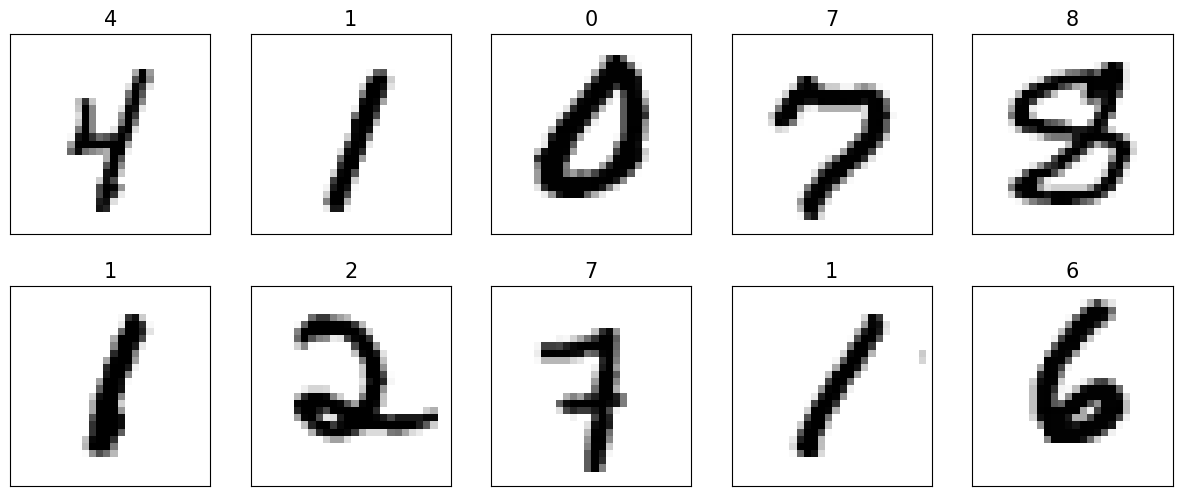

In [83]:
ds_train = mnist['train']

assert isinstance(ds_train, tf.data.Dataset)

ds_train = ds_train.map(lambda item:
     (item['image'], item['label']))

ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

fig = plt.figure(figsize=(15, 6))
for i,(image,label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r')
    ax.set_title('{}'.format(label), size=15)

plt.show()